In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from scipy.stats import ttest_ind
from collections import defaultdict
import math
import ujson

In [68]:
def load(fn):
    json = ujson.load(open(fn, 'r'))
    df = pd.DataFrame(json)
    return df

#local_leaf = load('../local_results.json')
local = load('../local_results.json')
local_size_8 = load('../local_results_size_8_custom_rules.json')
baseline = load('../baseline_results.json')

benches = ['bench/no_repl_size', 'bench/random_small_pat_size_8_leaf_only']
baseline = baseline[baseline.bench.str.startswith(benches[0]) | baseline.bench.str.startswith(benches[1])]
print(len(local[(local['distance'] == 'jaccard') & (local['rule-sets'] == 'leaf')]))

33


In [69]:
local_size_8

,bank-size,bench,distance,embed-file,eval-calls,found-program,lang,max-cost,print-json,program-cost,raw-eval-calls,rule-sets,rules-file,runtime,sample-states-time,search-close-states-time,search-thresh,seed,synth,verbose
0,1094,bench/random_small_pat_size_8_leaf_only/scene_...,jaccard,,59760,True,cad,9,True,7,4078964,"close-leaf,union-leaf,push-pull-replicate",,1794.710159,1126.659870,0.833035,(Distance 0.01),0,local-search-diverse,False
1,4816,bench/random_small_pat_size_8_leaf_only/scene_...,jaccard,,263874,True,cad,9,True,8,18704262,"close-leaf,union-leaf,push-pull-replicate",,8325.736761,4932.193518,2.513647,(Distance 0.01),0,local-search-diverse,False
2,4816,bench/random_small_pat_size_8_leaf_only/scene_...,jaccard,,264554,True,cad,9,True,8,18734721,"close-leaf,union-leaf,push-pull-replicate",,9161.082506,5277.691126,45.801640,(Distance 0.01),0,local-search-diverse,False
3,12259,bench/random_small_pat_size_8_leaf_only/scene_...,jaccard,,1226419,True,cad,9,True,9,96056572,"close-leaf,union-leaf,push-pull-replicate",,31004.176855,20227.710724,244.286299,(Distance 0.01),0,local-search-diverse,False
4,12259,bench/random_small_pat_size_8_leaf_only/scene_...,jaccard,,1224190,True,cad,9,True,13,95992571,"close-leaf,union-leaf,push-pull-replicate",,33380.273581,20429.712057,18.836260,(Distance 0.01),0,local-search-diverse,False
5,12259,bench/random_small_pat_size_8_leaf_only/scene_...,jaccard,,1226264,True,cad,9,True,7,96905421,"close-leaf,union-leaf,push-pull-replicate",,34173.996925,22642.894268,456.748962,(Distance 0.01),0,local-search-diverse,False
6,12259,bench/random_small_pat_size_8_leaf_only/scene_...,jaccard,,1224385,True,cad,9,True,9,96077849,"close-leaf,union-leaf,push-pull-replicate",,35449.798346,22388.641834,135.305405,(Distance 0.01),0,local-search-diverse,False
7,12259,bench/random_small_pat_size_8_leaf_only/scene_...,jaccard,,1223994,True,cad,9,True,9,95987220,"close-leaf,union-leaf,push-pull-replicate",,35471.422195,22504.701853,22.267818,(Distance 0.01),0,local-search-diverse,False
8,12259,bench/random_small_pat_size_8_leaf_only/scene_...,jaccard,,1224120,True,cad,9,True,9,95988697,"close-leaf,union-leaf,push-pull-replicate",,35570.827961,22810.294151,21.001816,(Distance 0.01),0,local-search-diverse,False
9,12259,bench/random_small_pat_size_8_leaf_only/scene_...,feature,,1224133,True,cad,9,True,7,96026833,"close-leaf,union-leaf,push-pull-replicate",,53038.828135,15415.953636,29721.907616,(Distance 0.01),0,local-search-diverse,False


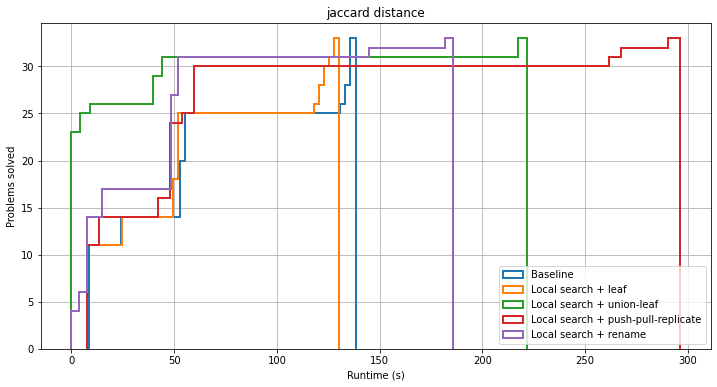

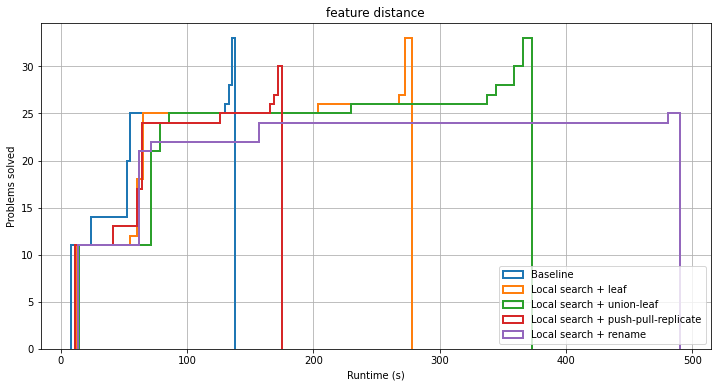

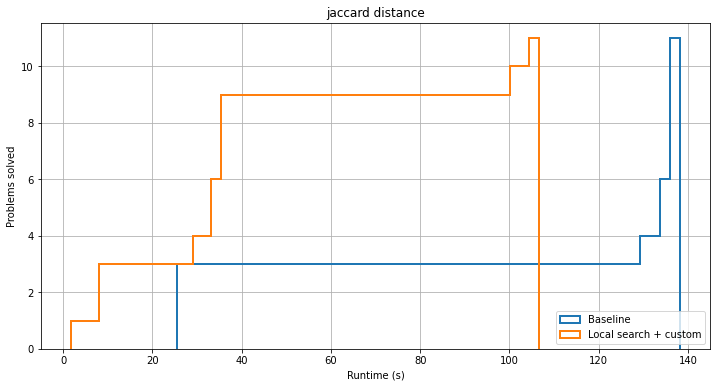

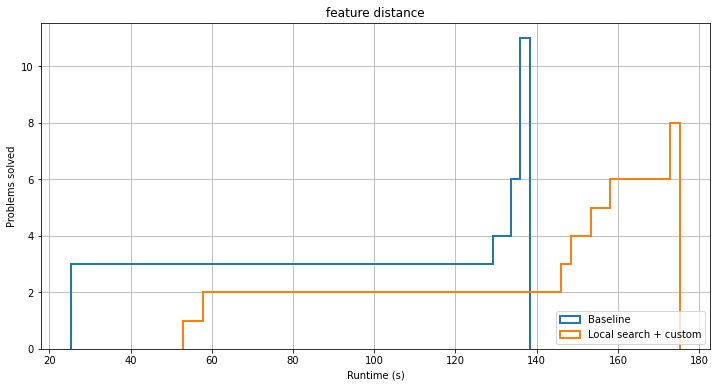

In [75]:

n_bins = 50

# plot the cumulative histogram
#n, bins, patches = ax.hist(runtime_df['runtime'] / 1000, n_bins, histtype='step',
#                           cumulative=True, label='All rules', linewidth=2.0)

for dist in ['jaccard', 'feature']:
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.hist(baseline['runtime'] / 1000, n_bins, histtype='step', cumulative=True, label='Baseline', linewidth=2.0)

    for rules in ['leaf', 'union-leaf', 'push-pull-replicate', 'rename']:
        ax.hist(local[(local['distance'] == dist) & (local['rule-sets'] == rules)]['runtime'] / 1000, n_bins, histtype='step', cumulative=True, label=f'Local search + {rules}', linewidth=2.0)


    # tidy up the figure
    ax.grid(True)
    ax.legend(loc='lower right')
    ax.set_title(f'{dist} distance')
    ax.set_xlabel('Runtime (s)')
    ax.set_ylabel('Problems solved')

    plt.show()
    
baseline_8 = baseline[baseline['bench'].str.contains('random_small_pat_size_8_leaf_only')]
for dist in ['jaccard', 'feature']:
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.hist(baseline_8['runtime'] / 1000, n_bins, histtype='step', cumulative=True, label='Baseline', linewidth=2.0)
    ax.hist(local_size_8[(local_size_8['distance'] == dist)]['runtime'] / 1000, n_bins, histtype='step', cumulative=True, label=f'Local search + custom', linewidth=2.0)


    # tidy up the figure
    ax.grid(True)
    ax.legend(loc='lower right')
    ax.set_title(f'{dist} distance')
    ax.set_xlabel('Runtime (s)')
    ax.set_ylabel('Problems solved')

    plt.show()

'bench/random_small_pat_size_8_leaf_only/scene_3.sexp'